In [9]:
import numpy as np
from script_compute_gaps_segment_modes import compute_gaps_segment_modes
from gaps_utilities import load_dictionary_from_file
from telescope_simulator import telescope_simulator

#----- Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Compute GAPS segment modes
Launch script to compute GAPS segment modal basis.

In [2]:
compute_gaps_segment_modes()

--> Segment KL modes computed successfully.
--> Initializing GMT pupil.....
--> Initializing MEMS model.....
Completed creation of influence function cube of size 460 x 460 x 2040.
--> Initializing PTT array model.....
Done! .....
Number of MEMS selected actuators: 1527
--> Computing DM influence matrices.....
DMmat condition number: 27.102474
--> Segment modes fitted by the DM computed successfully.
--> Computing PTT influence matrices.....
PTTmat condition number: 1.112952
--> Segment piston, tip, and tilt fitted by the PTT array only computed successfully.
--> Computing Merged influence matrices.....
--> Segment modes fitted by the DM + PTT array computed successfully.
--> Re-orthogonalizing...
--> GAPS segment modes computed successfully.
Saving to file /home/ubuntu/CEO/python/ceo/gaps/data/M2C/KLF_M2C_20250520_v0.npz


# Restore M2C and GAPS model parameters
Restore from saved file and use parameters to build GAPS models.

In [3]:
fname = "/home/ubuntu/CEO/python/ceo/gaps/data/M2C/KLF_M2C_20250520_v0.npz"
data = load_dictionary_from_file(fname)

Restoring data from file: KLF_M2C_20250520_v0.npz


In [4]:
gaps = telescope_simulator(**data['array_params'], **data['gaps_params'])

--> Initializing GMT pupil.....
--> Initializing MEMS model.....
Completed creation of influence function cube of size 460 x 460 x 2040.
--> Initializing PTT array model.....
Done! .....


In [15]:
KLF_M2C = data['KLF_M2C']
validacts = data['dm_valid_acts']
nPx = data['array_params']['array_size_pix']
KLF_M2C.shape

(1548, 153, 7)

## Visualize a mode as defined in the M2C matrix

Using the ``get_wf`` method

CPU times: user 1.26 s, sys: 1.44 s, total: 2.71 s
Wall time: 2.7 s


Text(0.5, 1.0, 'S2, KL91')

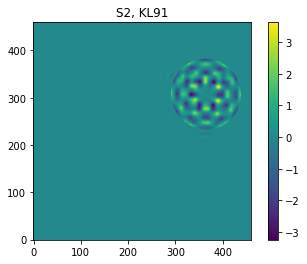

In [13]:
%%time

segId = 1
jj = 90  #--> choose mode number

pttvec, dmvec = np.split(KLF_M2C[:,jj,segId], [21])
dm_command = np.zeros(gaps.mems2k.n_acts)
dm_command[validacts] = dmvec
fitted_mode = gaps.get_wf(dm_command=dm_command, ptt_command=pttvec)

fig, ax2 = plt.subplots()
im2 = ax2.imshow(fitted_mode, origin='lower')
clb2 = fig.colorbar(im2, ax=ax2)
ax2.set_title('S%d, KL%d'%(segId+1, jj+1))

Using influence matrices. This method is more efficient since only valid points and valid DoFs are used in the computation.

In [14]:
DMmat, _ , _ = gaps.get_dm_influence_matrices(validacts)
PTTmat, _ , _ = gaps.get_ptt_influence_matrices()

--> Computing DM influence matrices.....
DMmat condition number: 27.102474
--> Computing PTT influence matrices.....
PTTmat condition number: 1.112952


CPU times: user 652 ms, sys: 356 ms, total: 1.01 s
Wall time: 129 ms


Text(0.5, 1.0, 'S2, KL91')

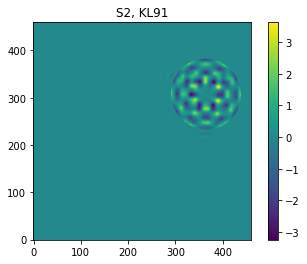

In [18]:
%%time

segId = 1
jj = 90  #--> choose mode number

_fitted_mode_ = np.zeros(nPx**2)
pttvec, dmvec = np.split(KLF_M2C[:,jj,segId], [21])
_fitted_mode_[gaps.pup.GMTmask] = PTTmat @ pttvec + DMmat @ dmvec

fig, ax2 = plt.subplots()
im2 = ax2.imshow(_fitted_mode_.reshape((nPx,nPx)), origin='lower')
clb2 = fig.colorbar(im2, ax=ax2)
ax2.set_title('S%d, KL%d'%(segId+1, jj+1))